# Steepest Descent

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

Here's a function. It's an oblong bowl made of two quadratic functions.

This is pretty much the easiest 2D optimization job out there.

In [2]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

Let's take a look at the function. First in 3D:

/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:517: DeprecationWarning: npy_PyFile_Dup is deprecated, use npy_PyFile_Dup2
  filename_or_obj, self.figure.dpi)


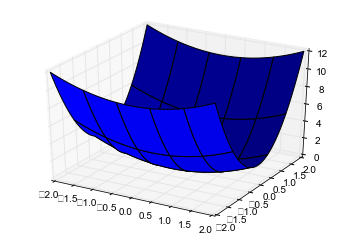

In [3]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

And then as a "contour plot":

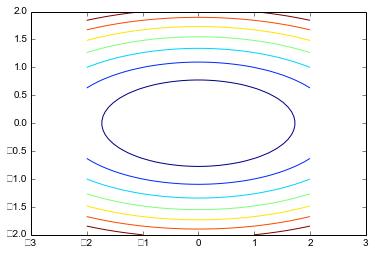

In [4]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Next, initialize steepest descent with a starting guess:

In [15]:
guesses = [np.array([2, 2./5])]

Next, run Steepest Descent:

In [27]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[ 0.17558299  0.0351166 ]


Here's some plotting code to illustrate what just happened:

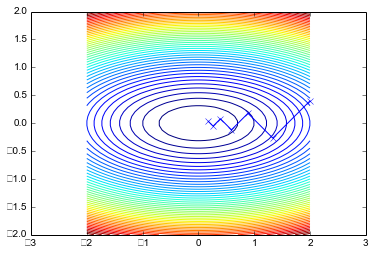

In [28]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")